<a href="https://colab.research.google.com/github/AravindYadav10/Complete-Python-3-Bootcamp/blob/master/algo%2Cfeb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
#Store the data
AAPL = pd.read_csv('AAPL.csv')
#Show the data
AAPL


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-02,135.729996,136.309998,134.610001,134.990005,134.162918,83305400
1,2021-02-03,135.759995,135.770004,133.610001,133.940002,133.119339,89880900
2,2021-02-04,136.300003,137.399994,134.589996,137.389999,136.548218,84183100
3,2021-02-05,137.350006,137.419998,135.860001,136.759995,136.125183,75693800
4,2021-02-08,136.029999,136.960007,134.919998,136.910004,136.274490,71297200
...,...,...,...,...,...,...,...
248,2022-01-26,163.500000,164.389999,157.820007,159.690002,159.690002,108275300
249,2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600
250,2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700
251,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600


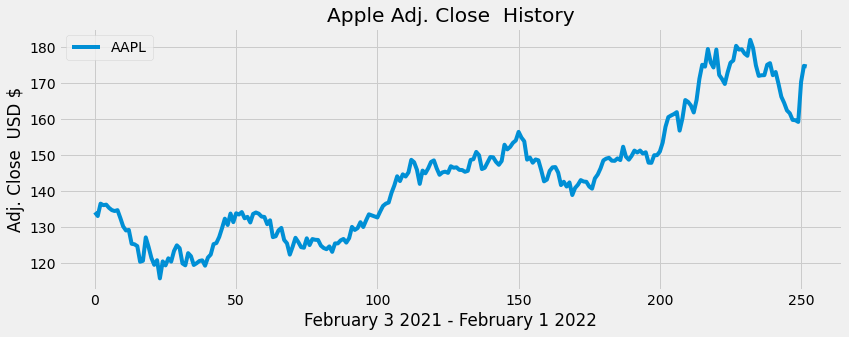

In [ ]:
#visualize the data

plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'],label = 'AAPL')
plt.title('Apple Adj. Close  History')
plt.xlabel('February 3 2021 - February 1 2022')
plt.ylabel('Adj. Close  USD $')
plt.legend(loc='upper left')
plt.show()

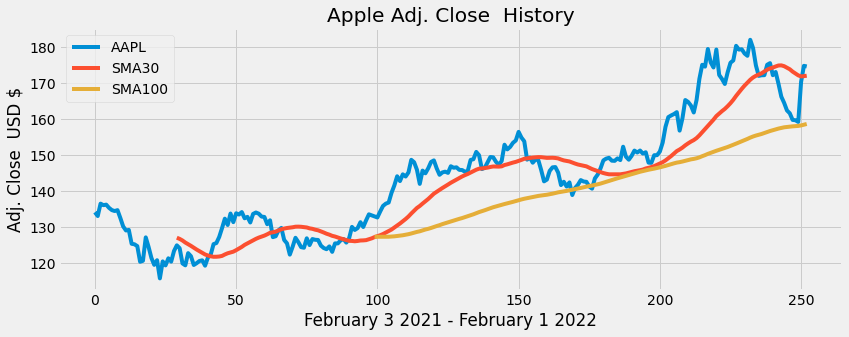

In [ ]:
#visualize the data
#visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'],label = 'AAPL')
plt.plot(SMA30['Adj Close'],label = 'SMA30')
plt.plot(SMA100['Adj Close'],label = 'SMA100')
plt.title('Apple Adj. Close  History')
plt.xlabel('February 3 2021 - February 1 2022')
plt.ylabel('Adj. Close  USD $')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create a simple moving average with a thirty day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,172.645333
249,172.141667
250,171.842667
251,171.926667


In [ ]:
#Create a simple moving average with a hundred day window
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window= 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,158.061161
249,158.112610
250,158.251293
251,158.450254


In [ ]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA100']=SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,134.162918,NaN,NaN
1,133.119339,NaN,NaN
2,136.548218,NaN,NaN
3,136.125183,NaN,NaN
4,136.274490,NaN,NaN
...,...,...,...
248,159.690002,172.645333,158.061161
249,159.220001,172.141667,158.112610
250,170.330002,171.842667,158.251293
251,174.779999,171.926667,158.450254


In [ ]:
#create a function to signal when to buy /sell a asset
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell=[]
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [ ]:
#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
#show the data
data


,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,134.162918,NaN,NaN,NaN,NaN
1,133.119339,NaN,NaN,NaN,NaN
2,136.548218,NaN,NaN,NaN,NaN
3,136.125183,NaN,NaN,NaN,NaN
4,136.274490,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,159.690002,172.645333,158.061161,NaN,NaN
249,159.220001,172.141667,158.112610,NaN,NaN
250,170.330002,171.842667,158.251293,NaN,NaN
251,174.779999,171.926667,158.450254,NaN,NaN


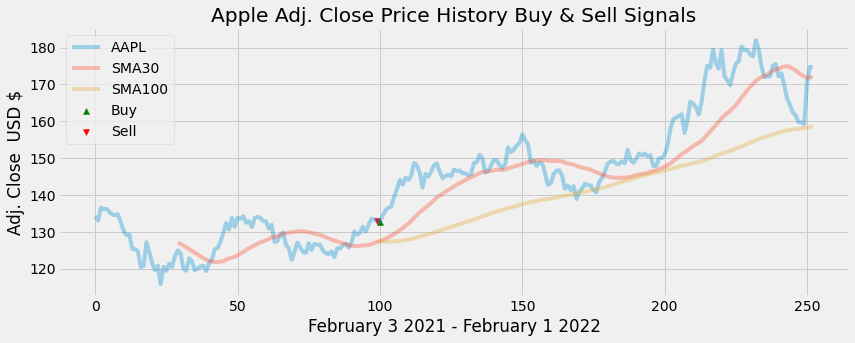

In [ ]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'],label ='AAPL',alpha = 0.35)
plt.plot(data['SMA30'],label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'],label = 'SMA100',alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'],label = 'Buy',marker = '^',color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('February 3 2021 - February 1 2022')
plt.ylabel('Adj. Close  USD $')
plt.legend(loc='upper left')
plt.show()

